Jameson Schryer

MSDS 686

# **Alzheimer’s MRI Classification**

To begin this project, open code in Google Colab and upload your personal Kaggle token.

#### Import Packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras import models, layers, backend
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import string
import re
np.random.seed(1)
import os
import shutil
from sklearn.metrics import confusion_matrix
import seaborn as sns

#### Import Data

In [ ]:
# Create folder and download the data there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images
! unzip alzheimers-dataset-4-class-of-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/m

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

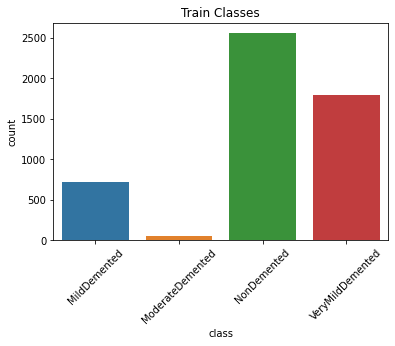

In [ ]:
#Get count of training classes
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
num_list = []
for i in classes:
  lst = os.listdir(os.path.join('Alzheimer_s Dataset/train', i)) 
  number_files = len(lst)
  num_list.append([i, number_files])
df = pd.DataFrame(num_list, columns=['class', 'count'])
sns.barplot(data=df, x='class', y='count')
plt.title('Train Classes')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

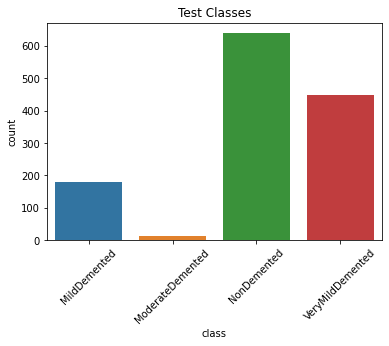

In [ ]:
#Get count of test classes
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
num_list = []
for i in classes:
  lst = os.listdir(os.path.join('Alzheimer_s Dataset/test', i)) 
  number_files = len(lst)
  num_list.append([i, number_files])
df = pd.DataFrame(num_list, columns=['class', 'count'])
sns.barplot(data=df, x='class', y='count')
plt.title('Test Classes')
plt.xticks(rotation=45)

#### Split data


In [ ]:
#Create Validation folder/ data
for category in ("MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"):
  os.makedirs("Alzheimer_s Dataset/val/" + category)
  files = os.listdir("Alzheimer_s Dataset/train/" + category)
  np.random.shuffle(files)
  num_val_samples = int(0.2*len(files))
  val_files = files[-num_val_samples:]
  for fname in val_files:
    shutil.move("Alzheimer_s Dataset/train/" + category + "/" + fname,
                "Alzheimer_s Dataset/val/" + category + "/" + fname)

In [ ]:
#Get paths
train_path = "Alzheimer_s Dataset/train"
test_path = "Alzheimer_s Dataset/test"
valid_path = "Alzheimer_s Dataset/val"

In [ ]:
#Create normalizers
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Pull data in from file locations

train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size=(176, 208), 
    batch_size=16, 
    class_mode='categorical') 

validataion_generator = train_datagen.flow_from_directory(
    valid_path,
    target_size=(176, 208), 
    batch_size=16,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(176, 208), 
    batch_size=16,
    class_mode='categorical')

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


## Show/plot sample images or data with labels

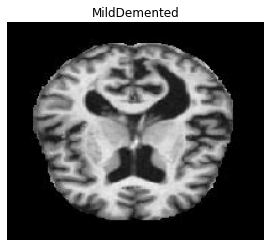

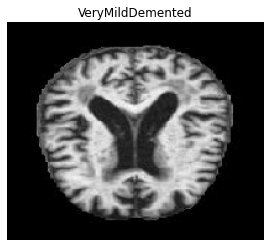

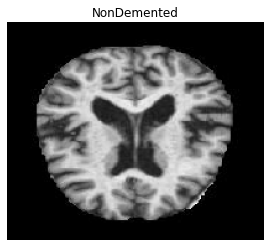

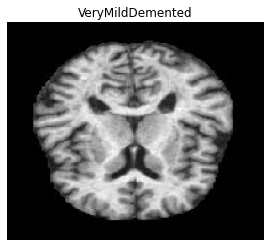

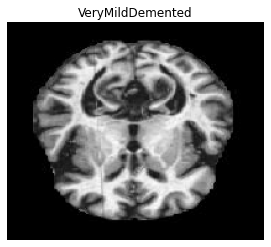

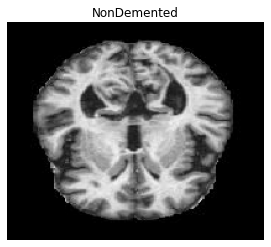

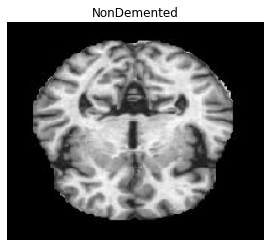

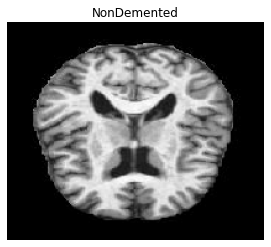

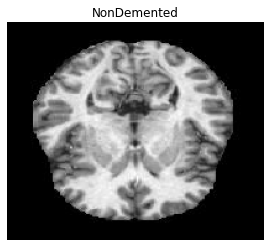

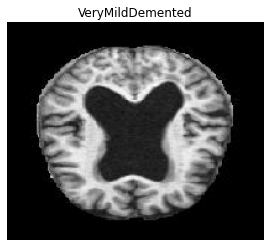

In [ ]:
#Show some example images
batch_1_img = train_generator[0]
for i in range(0,10):
  if np.array_equal(batch_1_img[1][i], [1., 0., 0., 0.]) == True:
    plt.imshow(batch_1_img[0][i])
    plt.title('MildDemented')
    plt.axis('off')
    plt.show()
  elif np.array_equal(batch_1_img[1][i], [0., 1., 0., 0.]) == True:
    plt.imshow(batch_1_img[0][i])
    plt.title('ModerateDemented')
    plt.axis('off')
    plt.show()
  elif np.array_equal(batch_1_img[1][i], [0., 0., 1., 0.]) == True:
    plt.imshow(batch_1_img[0][i])
    plt.title('NonDemented')
    plt.axis('off')
    plt.show()
  elif np.array_equal(batch_1_img[1][i], [0., 0., 0., 1.]) == True:
    plt.imshow(batch_1_img[0][i])
    plt.title('VeryMildDemented')
    plt.axis('off')
    plt.show()
  else:
    plt.imshow(batch_1_img[0][i])
    plt.title('ERROR')
    plt.axis('off')
    plt.show()


#### Augment dataset

In [ ]:
Augment = ImageDataGenerator( rescale=1./255, 
                             #rotation_range=40, 
                             #width_shift_range=0.2, 
                             #height_shift_range=0.2, 
                             #shear_range=0.2, 
                             #zoom_range=0.2, 
                             horizontal_flip=True)

train_generator = Augment.flow_from_directory( train_path, target_size=(176, 208), batch_size=16, class_mode='categorical')

validation_generator = Augment.flow_from_directory( valid_path, target_size=(176, 208), batch_size=16, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_path, target_size=(176, 208), batch_size=16, class_mode='categorical') 

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


#### Show/plot sample images or data with labels (Augmented)

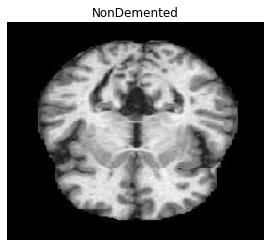

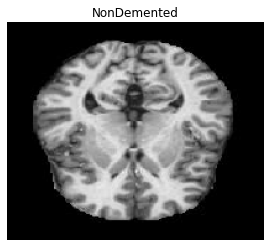

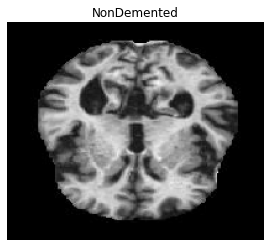

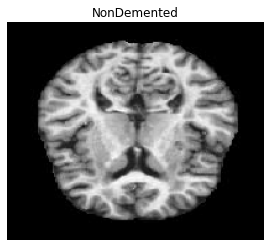

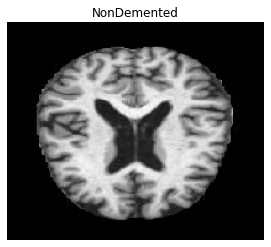

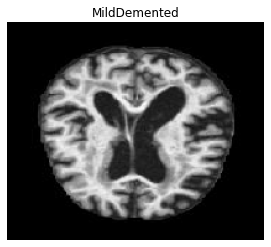

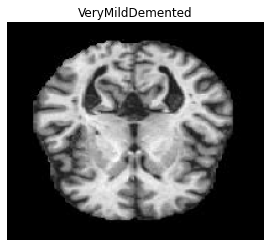

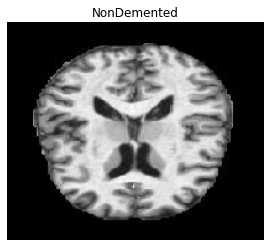

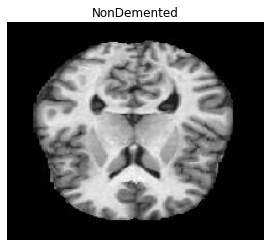

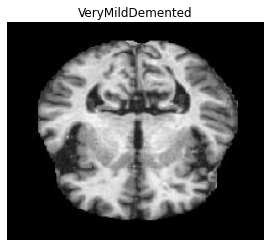

In [ ]:
#Display sample of augmented images
batch_1_img = train_generator[0]
for i in range(0,10):
  if np.array_equal(batch_1_img[1][i], [1., 0., 0., 0.]) == True:
    plt.imshow(batch_1_img[0][i])
    plt.title('MildDemented')
    plt.axis('off')
    plt.show()
  elif np.array_equal(batch_1_img[1][i], [0., 1., 0., 0.]) == True:
    plt.imshow(batch_1_img[0][i])
    plt.title('ModerateDemented')
    plt.axis('off')
    plt.show()
  elif np.array_equal(batch_1_img[1][i], [0., 0., 1., 0.]) == True:
    plt.imshow(batch_1_img[0][i])
    plt.title('NonDemented')
    plt.axis('off')
    plt.show()
  elif np.array_equal(batch_1_img[1][i], [0., 0., 0., 1.]) == True:
    plt.imshow(batch_1_img[0][i])
    plt.title('VeryMildDemented')
    plt.axis('off')
    plt.show()
  else:
    plt.imshow(batch_1_img[0][i])
    plt.title('ERROR')
    plt.axis('off')
    plt.show()

#### Create Model


In [ ]:
#Clear session
backend.clear_session()
# Build a cnn
def CNN():
  model = models.Sequential()
  model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape = [176,208,3]))
  model.add(keras.layers.MaxPooling2D())
  

  model.add(keras.layers.Conv2D(64, 3, activation='relu'))
  model.add(keras.layers.Conv2D(64, 3, activation='relu'))
  model.add(keras.layers.MaxPool2D())
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Conv2D(64, 3, activation='relu'))
  model.add(keras.layers.Conv2D(64, 3, activation='relu'))
  model.add(keras.layers.MaxPool2D())
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Conv2D(64, 3, activation='relu'))
  model.add(keras.layers.Conv2D(64, 3, activation='relu'))
  model.add(keras.layers.MaxPool2D())
  model.add(keras.layers.Dropout(0.3))
  
  model.add(keras.layers.Dense(2048, activation='relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(0.7))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(0.5))

  model.add(keras.layers.Conv2D(64, 3, activation='relu'))
  model.add(keras.layers.Conv2D(64, 3, activation='relu'))
  model.add(keras.layers.MaxPool2D())
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(.5))

  model.add(layers.Dense(4, activation='softmax'))

  model.compile(optimizer='adam',
  loss=tensorflow.losses.CategoricalCrossentropy(),
  metrics=[keras.metrics.AUC(name='auc')])
  return model


model = CNN()
model.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[EarlyStopping(monitor='auc', patience=3, restore_best_weights = True)])
loss, AUC = model.evaluate(test_generator)
print("Loss: ", loss)
print("AUC: ", AUC)

Epoch 1/100
257/257 [==============================] - 16s 56ms/step - loss: 1.0963 - auc: 0.7678 - val_loss: 3.4495 - val_auc: 0.7628
Epoch 2/100
257/257 [==============================] - 14s 54ms/step - loss: 1.0332 - auc: 0.7978 - val_loss: 1.8744 - val_auc: 0.7844
Epoch 3/100
257/257 [==============================] - 14s 53ms/step - loss: 1.0043 - auc: 0.8056 - val_loss: 1.1065 - val_auc: 0.7200
Epoch 4/100
257/257 [==============================] - 15s 57ms/step - loss: 0.9795 - auc: 0.8147 - val_loss: 1.1165 - val_auc: 0.7149
Epoch 5/100
257/257 [==============================] - 14s 55ms/step - loss: 0.9536 - auc: 0.8237 - val_loss: 1.0368 - val_auc: 0.7872
Epoch 6/100
257/257 [==============================] - 14s 53ms/step - loss: 0.9588 - auc: 0.8212 - val_loss: 1.1362 - val_auc: 0.7387
Epoch 7/100
257/257 [==============================] - 14s 53ms/step - loss: 0.9453 - auc: 0.8257 - val_loss: 1.6381 - val_auc: 0.8052
Epoch 8/100
257/257 [==============================] - 

#### Confusion Matrix

80/80 [==============================] - 2s 21ms/step


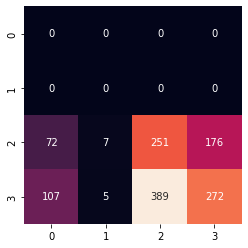

In [ ]:
#Get Predictions, labels, and create a confusion matrix
y_prob = model.predict(test_generator)
y_pred = y_prob.argmax(axis=-1)
y_actual = test_generator.classes
mat = confusion_matrix(y_actual, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)